In [148]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [116]:
path=r'C:\Users\mrliangcb\Desktop\note\extra_feature\test.csv'#遇到逗号算一个列分割，遇到\n转下一行
df1 = pd.read_csv(path,nrows=None) #names=["a","b","c"]标列名，这里没name就取第一行作为列名字，航标自动设置0~序号
#header=None指的是说明这个文件第一行就是数据，没有列名。默认是有的，就会把第一行当做列名




In [117]:
#一、拿到数据，先读属性
print('\n1.读前5行\n',df1.head(5))#tail看尾巴
print('\n2.形状\n',df1.shape)
print('\n3.有哪些列:\n',df1.columns)
print('\n4.每个列的数据类型:\n',df1.columns)


1.读前5行
               ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0  OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1  OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2  OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3  OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
4  OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   

   Delay  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  

2.形状
 (12, 12)

3.有哪些列:
 Index(['ID', 'M/F', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF', 'Delay'],
      dtype='object')

4.每个列的数据类型:
 Index(['ID', 'M/F', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF', 'Delay'],
      dtype='object')


In [131]:
#二、条件过滤方式
    #1.series索引和data索引对比  series[series.dtypes!='object']
        #这是series的筛选
        a=df1.ID[df1['ID']=='OAS1_0003_MR1']#返回一个series,df['ID']=df.ID,
        print('series过滤:\n',a)
        
        #这是df的筛选
        a=df1[df1['ID']=='OAS1_0003_MR1']#返回一个df，可以用\\和&&来连接判断语句
        print('df过滤\n',a)
        a=df1[df1.loc[:,'ID']=='OAS1_0003_MR1']#返回df
        print(a)
        
        #
        
        
        
        

series过滤:
 2    OAS1_0003_MR1
Name: ID, dtype: object
df过滤
               ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
2  OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   

   Delay  
2    NaN  
              ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
2  OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   

   Delay  
2    NaN  


In [140]:
#三、索引对比
    #1.返回series
        #注意df[]返回series，df[[]]返回df
        #返回series
        
        a=df1['ID']#[2]可以选值
        print('(1)：标准选series方法\n',a)
        
        #a=df1.ix[[2,3,4],['ID']]#多列的时候返回df，因为单列用[]，多列用[[]]
        #print('(2)返回series:\n',a)
    ##返回df
        a=df1[['ID']].loc[[1,2]]#因为第一个属性选了[[]]所以返回df，如果是[]则返回series,loc是不改变本身类型的，第一选列，第二loc选行
        print('(1)返回df:\n',a)
    ##返回一个value
        print('返回一个值:\n')
        df1.ID.loc[1]
        df1.loc[3,'ID']
        
    ##选行
        type(data.loc[  list[]  ])#返回df或者series
    #选列
        df[ list或者index  ]
    
    ##返回np
        #df.values
        
    ##查找空值
        #df[df.loc[:,'Age'].isnull()].index()
    
    ##一般最常用是loc

(1)：标准选series方法
 0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
Name: ID, dtype: int32
(1)返回df:
    ID
1   1
2   2
返回一个值:



pandas.core.series.Series

In [135]:
#四、修改
    df2=df1
    #整列修改 
    b=pd.Series(np.arange(12))
    df2[['ID']]=b #直接取他的series出来改22可以改成series，赋值的时候，会对应series的行标，不是强硬赋值
    print(df1)
    
    #只修改一个值
    df1.Hand.loc[3]=50#选出来的就是一个value，然后赋值
    print(df1)
    df1.Hand.loc[3]
    
    #排列行标
    #a=np.arange(0,data.shape[0])
    #data.index=[a]
    

    ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  Delay
0    0   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306    NaN
1    1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531    NaN
2    2   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207    NaN
3    3   M   50   28   NaN  NaN   NaN  NaN  1588  0.803  1.105    NaN
4    4   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010    NaN
5    5   F    R   24   NaN  NaN   NaN  NaN  1131  0.862  1.551    NaN
6    6   M    R   21   NaN  NaN   NaN  NaN  1516  0.830  1.157    NaN
7    7   F    R   20   NaN  NaN   NaN  NaN  1505  0.843  1.166    NaN
8    8   M    R   74   5.0  2.0  30.0  0.0  1636  0.689  1.073    NaN
9    9   F    R   52   3.0  2.0  30.0  0.0  1321  0.827  1.329    NaN
10  10   M    R   30   NaN  NaN   NaN  NaN  1574  0.842  1.115    NaN
11  11   F    R   81   5.0  2.0  30.0  0.0  1664  0.679  1.055    NaN
    ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  Delay
0    0   F    R   74

50

In [130]:
df1 = pd.read_csv(path,nrows=None) #names=["a","b","c"]标列名，这里没name就取第一行作为列名字，航标自动设置0~序号

In [110]:
#五、转换类型
    #选一个一维的东西进行tolist()，一列、一行都可以作为一维
    a=df1.ID.tolist()
    print(a)
    a=df1.loc[3].tolist()
    print(a)
    
    #转numpy
    #np.array()
    
    #转list
    #.tolist()

[22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]
[22, 'M', 22, 28, nan, nan, nan, nan, 1588, 0.8029999999999999, 1.105, nan]


In [ ]:
#六、增
    #1、result=pd.concat([x,y],axis=1)#1是水平拼接，0是垂直，而且拼接的时候对应index的拼接
    
    #2、df['新增的列名']=2 #可以复制value或者series或者list
    s=pd.DataFrame({'all':[1,2,3],
        'P1':[1,2,3],'P2':[1,2,3],
        'P3':[1,2,3]},index=['0-30','30-60','60-82'])#大家都有的属性是放在'',关键字，私有的叫做index,,columns=['a','b']参数是选择显示哪些列
    b=pd.Series([1,2],index=['0-30','d'])
    s['add']=b
    print(s) #因为se自己有index，所以赋值的时候，会匹配上data的inex，然后再赋值，没有对应index的不赋值
    
    #增加行
    #da=np.array([[1,12,3]])
    #df2=pd.DataFrame(da,columns=['imgID','ground_true','answer'])
    #df3=df1.append(df2)
    

In [ ]:
#七、删除
    #删除列
    #data.drop(['ID'],axis=1,inplace=True)
    
    #删除行
    #data.drop([0,1,2,3],axis=0)

In [156]:
#八创建
    #np创建
    df2=pd.DataFrame(np.arange(16).reshape((4,4)),index=['a','b','c','d'],columns=['one','two','three','four'])
    print(df2)
    
    #字典创建
    s=pd.DataFrame({'all':[1,2,3],
        'P1':[1,2,3],'P2':[1,2,3],
        'P3':[1,2,3]},index=['0-30','30-60','60-82'])#大家都有的属性是放在'',关键字，私有的叫做index,,columns=['a','b']参数是选择显示哪些列
    print(s)


   one  two  three  four
a    0    1      2     3
b    4    5      6     7
c    8    9     10    11
d   12   13     14    15
       all  P1  P2  P3
0-30     1   1   1   1
30-60    2   2   2   2
60-82    3   3   3   3


       all  P1  P2  P3
0-30     1   1   1   1
30-60    2   2   2   2
60-82    3   3   3   3


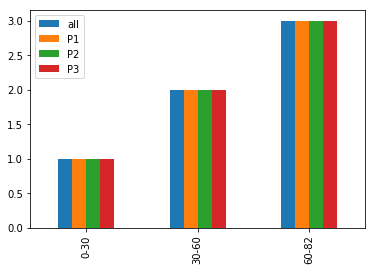

In [159]:
#九、统计api功能
    #按照某列的大小排列
    #df.sort_values(by='Age')
    
    #求相关性
    #df.corr()
    
    #计数
    #df.ID.count()#相当于series.count()
    
    #统计频次
    #df.Age.value_counts(ascending=True)#参数表示排列顺序
    
    #统计某个列  0出现的次数
    #dict(df[0]value_counts())
    
    #普通排列
    #np.sort(a,axis=0)
    
    #用df进行统计画图
    s=pd.DataFrame({'all':[1,2,3],
        'P1':[1,2,3],'P2':[1,2,3],
        'P3':[1,2,3]},index=['0-30','30-60','60-82'])#大家都有的属性是放在'',关键字，私有的叫做index
    print(s)
    s.plot(kind='bar')
    plt.show()
    
    
    
    

In [213]:
#十、运算

    #1、基本
    df2=pd.DataFrame(np.arange(10,30,1).reshape((4,5)))#index=['a','b','c','d'],columns=['one','two','three','four']
    df2['name']=['liang','duan','wang','hua']
    print(df2)
    #df2.loc[[1,2],[1,2]]
    df2.dtypes
    #先选出所以可以计算的类型
    df_col_index=df2.dtypes[df2.dtypes!='object'].index
    print(df_col_index)#列名的index，因为列名在dtype的series里面是作为行index
    df_num=df2[df_col_index] #把数字类型的列拿出来
    print(df_num)
    #print(df_num)
    ##对每个元素做公式运算
    a=df_num.apply(lambda x:(x-x.mean())/x.std())
    #拿出来计算之后，又赋值给回df2   选取多个series进行赋值
    df2[df_col_index]=a
    print(df2)
    #完成计算（通常是拿出来计算，然后又赋值回去）
    
    #2、拿出来算np.log  因为x要是正数的
    
    df2[0].loc[[0,1]]=1 #选出一个series，然后选第1第2个值
    print(df2)
    print(np.log(df2[0]))
    
    

    0   1   2   3   4   name
0  10  11  12  13  14  liang
1  15  16  17  18  19   duan
2  20  21  22  23  24   wang
3  25  26  27  28  29    hua
Index([0, 1, 2, 3, 4], dtype='object')
    0   1   2   3   4
0  10  11  12  13  14
1  15  16  17  18  19
2  20  21  22  23  24
3  25  26  27  28  29
          0         1         2         3         4   name
0 -1.161895 -1.161895 -1.161895 -1.161895 -1.161895  liang
1 -0.387298 -0.387298 -0.387298 -0.387298 -0.387298   duan
2  0.387298  0.387298  0.387298  0.387298  0.387298   wang
3  1.161895  1.161895  1.161895  1.161895  1.161895    hua
          0         1         2         3         4   name
0  1.000000 -1.161895 -1.161895 -1.161895 -1.161895  liang
1  1.000000 -0.387298 -0.387298 -0.387298 -0.387298   duan
2  0.387298  0.387298  0.387298  0.387298  0.387298   wang
3  1.161895  1.161895  1.161895  1.161895  1.161895    hua
0    0.000000
1    0.000000
2   -0.948560
3    0.150052
Name: 0, dtype: float64


In [6]:
#十一、读取，可以用来读txt，csv好方便
    import pandas as pd
    path=r'C:\Users\mrliangcb\Desktop\note\extra_feature\open\labels.txt'
    a=pd.read_csv(path,header=None,sep=',')#说明遇到,则认为是下一个value,没有列名
    print(type(a.values[0,0]))#返回的是二维的np
   


<class 'numpy.int64'>


In [ ]:
#十二、保存
    #data.to_csv(path,sep=',',index=0)#不同value之间用逗号隔开,na_rep='NA',float_format='%.2f'保留两位小数,header=0不保留列名,index=0不保留行索引
    
    #np.savetxt(path,c,fmt='%d')#03d表示整数为3位，不够的话前面添0

In [157]:
#选取比较
#返回df
print(data.loc[[1,2,3]])
print(data[['Age','Hand']])
#返回series，可以tolist
print(data['ID'])

#行没有series，但可以这样取list，而且数字类型还是数字类型
c=np.array(data)
print(c[0].tolist())


              ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
1  OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2  OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3  OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   

   Delay  
1    NaN  
2    NaN  
3    NaN  
    Age Hand
0    74    R
1    55    R
2    73    R
3    28    R
4    18    R
5    24    R
6    21    R
7    20    R
8    74    R
9    52    R
10   30    R
11   81    R
0     OAS1_0001_MR1
1     OAS1_0002_MR1
2     OAS1_0003_MR1
3     OAS1_0004_MR1
4     OAS1_0005_MR1
5     OAS1_0006_MR1
6     OAS1_0007_MR1
7     OAS1_0009_MR1
8     OAS1_0010_MR1
9     OAS1_0011_MR1
10    OAS1_0012_MR1
11    OAS1_0013_MR1
Name: ID, dtype: object
['OAS1_0001_MR1', 'F', 'R', 74, 2.0, 3.0, 29.0, 0.0, 1344, 0.743, 1.306, nan]
